In [1]:
__author__ = 'bingxian'

### instsall the necessary libraries and packages ###

import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from textblob import Word

import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# import csv file
job_df = pd.read_csv('jobs - Copy.csv')
job_df = job_df.drop(columns = 'index')

job_df.head()

##################### Data Cleaning #####################
def cleanTitle(title):
    for i in range(len(title)):
        if title[i] == 'analyst':
            result1 = title[i-1] + ' analyst' 
        else:
            result1 = title[0:i]
            result1 = ' '.join(result1)
    
    return result1

def clean_names(title):
    
    title = title.lower().strip()   
    title = re.sub("[.'&$[\/’\"\-()]", '', title)
    
    ## Remove non ASCII characters
    title = re.sub(r'[^\x00-\x7F]+', '', title)
    
    return title

    
## get the first five digits after the dollar sign

def getSalary(string):
    if string != None:
        reg = re.compile('\$(\d+,\d+)')
        salary = re.findall(reg, string)

        salary = list(salary)
        letters = [i for i in salary[0]]
        words = [item.replace('−','') for item in letters]
        result = ''.join(words)
        
        return result

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BingXianLee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BingXianLee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BingXianLee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
job_df['jd'] = job_df['jd'].apply(clean_names)
job_df['title'] = job_df['title'].apply(clean_names)
job_df['salary'] = job_df['salary'].apply(getSalary)
job_df['salary'] = job_df['salary'].str.replace('(?<=\d),(?=\d)', '')
job_df['salary'] = job_df['salary'].astype('int32')
job_df.head()

,title,company,salary,jd
0,data analyst,HYPERSCAL SOLUTIONS PTE. LTD.,3500,"developing and maintaining databases, data sys..."
1,data visualization,BASIL TECHNOLOGIES PTE. LTD.,6000,migrate and operationalise homegrown reports t...
2,data analyst junior,TECHKNOWLEDGEY PTE. LTD.,4000,"good understanding of data structure, database..."
3,data analyst crypto blockchain,ALIGN RECRUITMENT PTE. LTD.,5000,with 2 years or more of data analysis or data ...
4,data analyst,Bioquest Advisory,3000,preparing data pipeline through data cleansing...
...,...,...,...,...
367,"svp, martech delivery lead, group consumer ban...",DBS BANK LTD.,17000,expertise in modern marketing customer data so...
368,"avp, full stack lead developer, group consumer...",DBS BANK LTD.,6500,"strong foundation in computer science, with st..."
369,6606 business operation analyst business ac...,THE SUPREME HR ADVISORY PTE. LTD.,4500,analyse data and information to identify busin...
370,6606 business operation analyst business ac...,THE SUPREME HR ADVISORY PTE. LTD.,4500,analyse data and information to identify busin...


In [3]:
##################### Exploring the data #####################

## Exploring Salary 

job_df['salary'].describe()

count       372.000000
mean      10385.884409
std       23104.281760
min        1000.000000
25%        3500.000000
50%        5000.000000
75%        7000.000000
max      204000.000000
Name: salary, dtype: float64

In [4]:
# Exploring words in job description
# tokenize each title using list comprehension
job_desc = job_df['jd'].tolist()
tokenized = []

for desc in job_desc:
    tokenized.append(word_tokenize(desc)) # < 
tokenized[0:10]

STOP_WORDS = stopwords.words()

job_df['jd'] = job_df['jd'].apply(lambda x: " ".join(x for x in x.split() if x not in STOP_WORDS))
job_df['jd'] = job_df['jd'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [5]:
text = " ".join(desc for desc in job_df.jd)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 45710 words in the combination of all review.


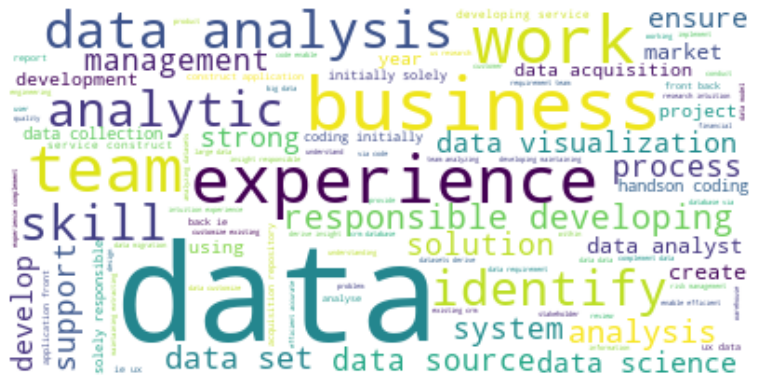

In [6]:
wordcloud = WordCloud(stopwords=STOP_WORDS, background_color="white").generate(text)

# Display the generated image:
figure(figsize=(12, 12), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()